In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque
import heapq
import time


The graph represents a disaster-affected urban area with 20 locations (nodes) such as a command center (start node 'A'), victim locations, safe zones, or intersections. Edges represent navigable paths (e.g., roads, corridors) with weights indicating costs like travel time, distance, or risk level (e.g., debris or hazards). The goal is to find a path from the command center ('A') to a trapped victim's location ('T'). The larger graph tests the algorithms' scalability:

BFS: Finds the shortest path by number of edges (unweighted), useful for minimizing the number of segments traversed.
DFS: Quickly explores deep paths, potentially finding a non-optimal path, useful for rapid exploration in time-sensitive rescues.
UCS: Finds the lowest-cost path (weighted), optimizing for safety or speed in the disaster scenario.

In [ ]:
# Create the graph with 20 nodes
G = nx.Graph()
edges = [
    ('A', 'B', 1), ('A', 'C', 4), ('A', 'D', 3), ('B', 'E', 2), ('B', 'F', 5),
    ('C', 'G', 3), ('C', 'H', 6), ('D', 'I', 2), ('D', 'J', 4), ('E', 'K', 3),
    ('F', 'K', 4), ('F', 'L', 7), ('G', 'M', 2), ('G', 'N', 5), ('H', 'N', 4),
    ('H', 'O', 3), ('I', 'P', 1), ('I', 'Q', 5), ('J', 'Q', 3), ('J', 'R', 6),
    ('K', 'S', 2), ('L', 'S', 4), ('L', 'T', 3), ('M', 'T', 2), ('N', 'T', 5),
    ('O', 'T', 4), ('P', 'S', 2), ('Q', 'T', 3), ('R', 'T', 7), ('S', 'T', 1)
]
G.add_weighted_edges_from(edges)

# **Function to calculate total path cost**

In [ ]:

def path_cost(graph, path):
    if not path or len(path) < 2:
        return float('inf')
    total = 0
    for i in range(len(path) - 1):
        total += graph[path[i]][path[i+1]]['weight']
    return total

## **Function to visualize the graph and highlight a path**

In [ ]:

def visualize_path(graph, path, title):
    pos = nx.kamada_kawai_layout(graph, weight='weight', scale=1.0)  # Scale edges by weight
    plt.figure(figsize=(10, 8))
    nx.draw(graph, pos, with_labels=True, node_color='lightblue', node_size=500, font_weight='bold')
    edge_labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_labels)
    if path:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(graph, pos, edgelist=path_edges, edge_color='red', width=3)
    plt.title(title)
    plt.show()

# **# BFS Implementation**

In [ ]:

def bfs(graph, start, goal):
    if start == goal:
        return [start]
    queue = deque([(start, [start])])
    visited = {start}
    while queue:
        current, path = queue.popleft()
        for neighbor in graph.neighbors(current):
            if neighbor not in visited:
                visited.add(neighbor)
                new_path = path + [neighbor]
                if neighbor == goal:
                    return new_path
                queue.append((neighbor, new_path))
    return None

# **DFS Implementation**

In [ ]:
# DFS Implementation
path1 = [];
def dfs(graph, start, goal, visited):
    global path1
    if start == goal:
        path1 = path1 + [goal]
        return path1
    if start in visited:
      return
    visited.add(start)
    path1 = path1 + [start]
    for v in graph.neighbors(start):
        if v not in visited:
            res = dfs(graph, v, goal, visited)
            if res is not None:
              return res
    return None



In [ ]:
def ucs(graph, start, goal):
    pq = [(0, start)]
    dist = {node: float('inf') for node in graph}
    dist[start] = 0
    par = {start: None}
    while pq:
        cost, u = heapq.heappop(pq)
        if u == goal:
            break
        for v in graph.neighbors(u):
            w = graph[u][v]['weight']
            if dist[u] + w < dist[v]:
                dist[v] = dist[u] + w
                par[v] = u
                heapq.heappush(pq, (dist[v], v))
    path = []
    if dist[goal] == float('inf'):
        return []
    cur = goal
    while cur is not None:
        path.append(cur)
        cur = par[cur]
    path.reverse()
    return path

In [ ]:
# Main execution: Run and analyze
start = 'A'
goal = 'T'



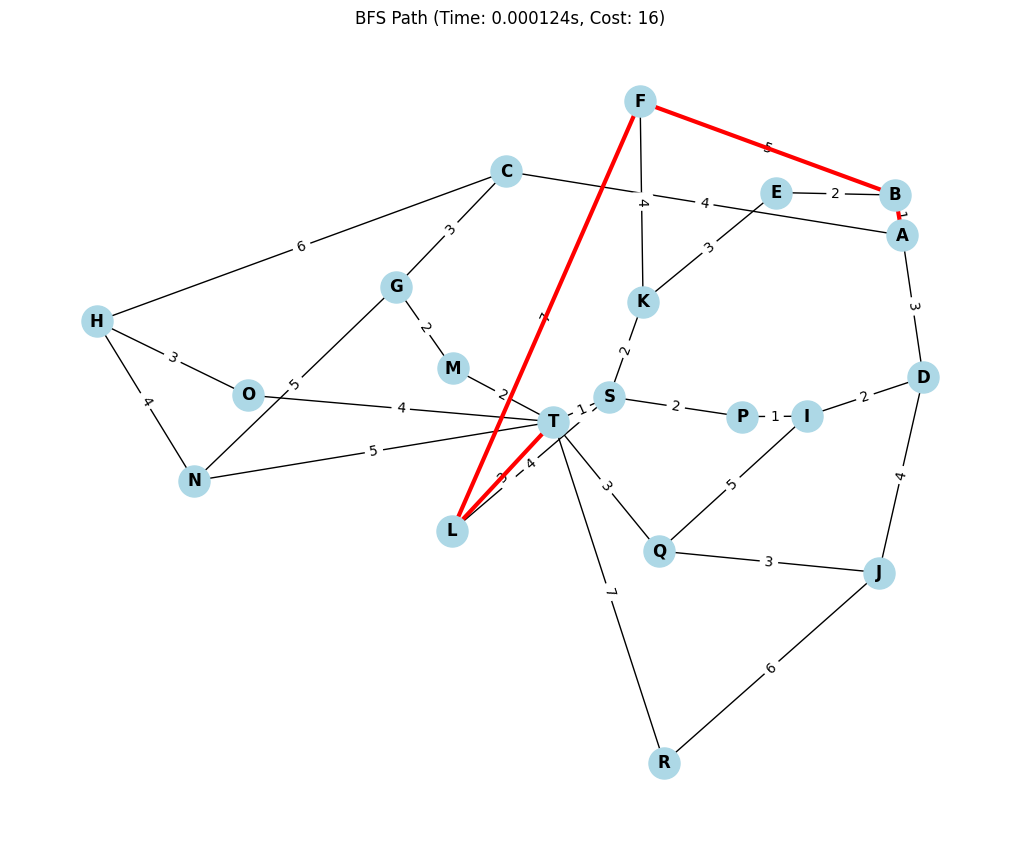

In [ ]:
# BFS
start_time = time.perf_counter()
bfs_path = bfs(G, start, goal)
bfs_time = time.perf_counter() - start_time
bfs_cost = path_cost(G, bfs_path)
visualize_path(G, bfs_path, f'BFS Path (Time: {bfs_time:.6f}s, Cost: {bfs_cost})')

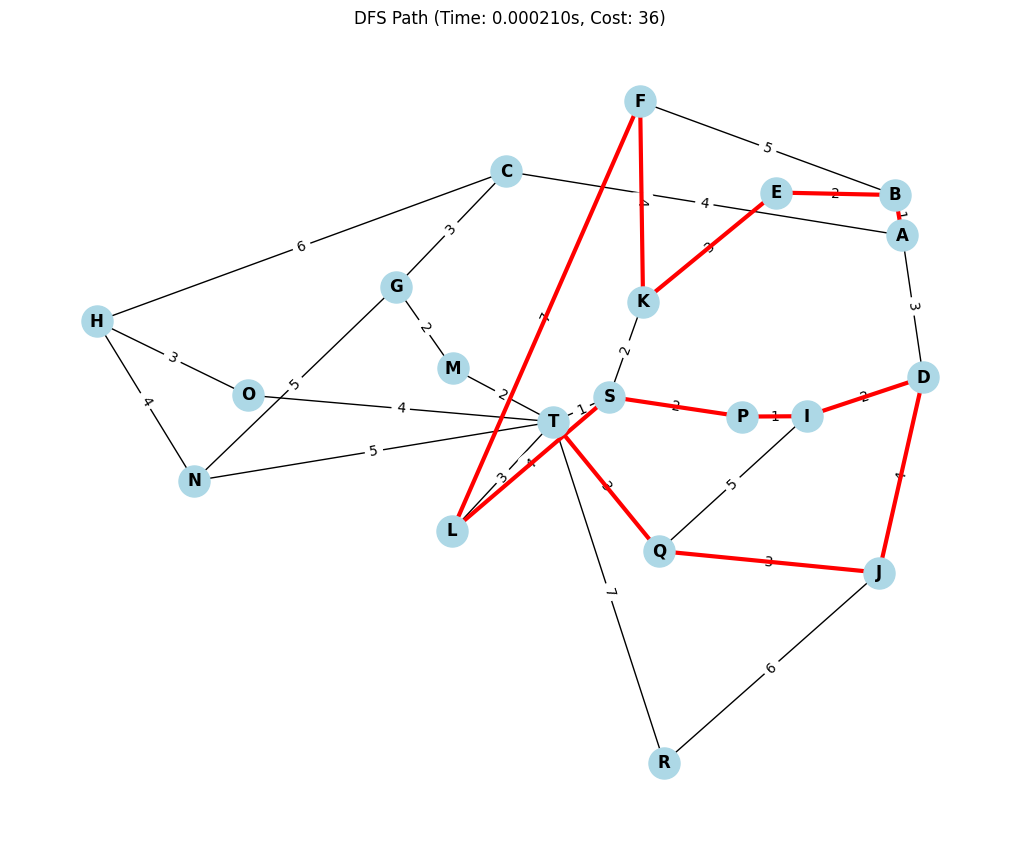

In [ ]:
# DFS
visited = {'a'}
start_time = time.perf_counter()
dfs_path = dfs(G, start, goal, visited)
dfs_time = time.perf_counter() - start_time
dfs_cost = path_cost(G, dfs_path)
visualize_path(G, dfs_path, f'DFS Path (Time: {dfs_time:.6f}s, Cost: {dfs_cost})')

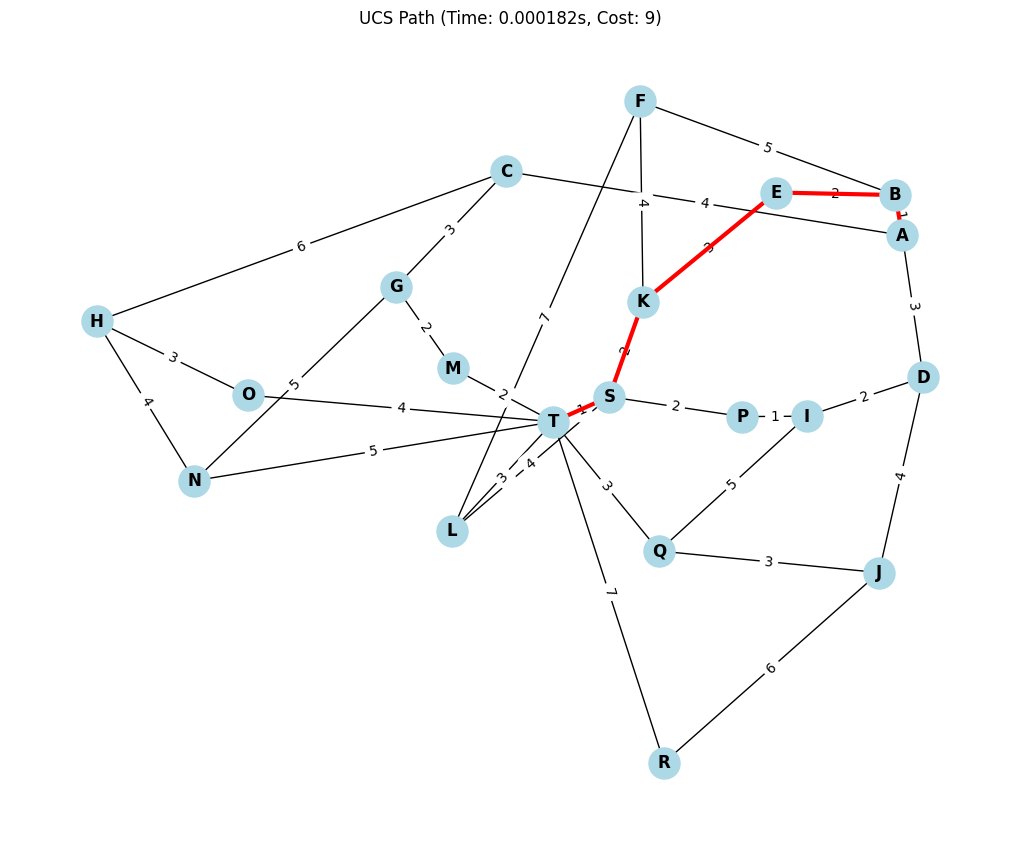

In [ ]:
# UCS
start_time = time.perf_counter()
ucs_path = ucs(G, start, goal)
ucs_time = time.perf_counter() - start_time
ucs_cost = path_cost(G, ucs_path)
visualize_path(G, ucs_path, f'UCS Path (Time: {ucs_time:.6f}s, Cost: {ucs_cost})')

In [ ]:

# Print results
print("BFS Path:", bfs_path, f"(Cost: {bfs_cost}, Steps: {len(bfs_path)-1 if bfs_path else 'N/A'}, Time: {bfs_time:.6f}s)")
print("DFS Path:", dfs_path, f"(Cost: {dfs_cost}, Steps: {len(dfs_path)-1 if dfs_path else 'N/A'}, Time: {dfs_time:.6f}s)")
print("UCS Path:", ucs_path, f"(Cost: {ucs_cost}, Steps: {len(ucs_path)-1 if ucs_path else 'N/A'}, Time: {ucs_time:.6f}s)")

BFS Path: ['A', 'B', 'F', 'L', 'T'] (Cost: 16, Steps: 4, Time: 0.000124s)
DFS Path: ['A', 'B', 'E', 'K', 'F', 'L', 'S', 'P', 'I', 'D', 'J', 'Q', 'T'] (Cost: 36, Steps: 12, Time: 0.000210s)
UCS Path: ['A', 'B', 'E', 'K', 'S', 'T'] (Cost: 9, Steps: 5, Time: 0.000182s)
